You can choose from either of these two datasets:

1. Data Wrangling with Python: Activity 9, page 294

Import the necessary libraries

In [1]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

Check the SSL Certificate

In [2]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

Read the HTML from the URL

In [3]:
# Read the HTML from the URL and pass on to BeautifulSoup
top100url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(top100url)

Write a small function to check the status of the web request

In [4]:
def status_check(r):
    if r.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed!")
        return -1

In [5]:
status_check(response)

Success!


1

Decode the response and pass this on to BeautifulSoup for HTML parsing

In [6]:
contents = response.content.decode(response.encoding)

In [7]:
soup = BeautifulSoup(contents, 'html.parser')

Find all the href tags and store them in the list of links. Check what the list looks like – print the first 30 elements

In [8]:
# Empty list to hold all the http links in the HTML page
lst_links=[]

In [9]:
# Find all the href tags and store them in the list of links
for link in soup.find_all('a'):
    #print(link.get('href'))
    lst_links.append(link.get('href'))

In [10]:
lst_links[:30]

['/wiki/Main_Page',
 '/catalog/',
 '/ebooks/',
 '/browse/recent/last1',
 '/browse/scores/top',
 '/wiki/Gutenberg:Offline_Catalogs',
 '/catalog/world/mybookmarks',
 '/wiki/Main_Page',
 'https://www.paypal.com/xclick/business=donate%40gutenberg.org&item_name=Donation+to+Project+Gutenberg',
 '/wiki/Gutenberg:Project_Gutenberg_Needs_Your_Donation',
 'http://www.ibiblio.org',
 'http://www.pgdp.net/',
 'pretty-pictures',
 '#books-last1',
 '#authors-last1',
 '#books-last7',
 '#authors-last7',
 '#books-last30',
 '#authors-last30',
 '/ebooks/1342',
 '/ebooks/11',
 '/ebooks/1635',
 '/ebooks/1661',
 '/ebooks/2701',
 '/ebooks/25525',
 '/ebooks/1952',
 '/ebooks/84',
 '/ebooks/514',
 '/ebooks/5200',
 '/ebooks/2591']

Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 eBooks

Initialize the empty list to hold the file numbers over an appropriate range and use regex to find the numeric digits in the link href string. Use the findall method

In [11]:
# Initialize empty list to hold the file numbers
booknum=[]

In [12]:
for i in range(19,119):
    link=lst_links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknum.append(int(n[0]))

In [13]:
print ("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(booknum)


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1342, 11, 1635, 1661, 2701, 25525, 1952, 84, 514, 5200, 2591, 2542, 98, 345, 205, 408, 2600, 74, 1080, 158, 120, 1232, 43, 4300, 1184, 174, 1260, 16, 376, 76, 45, 46, 844, 1497, 6130, 1400, 203, 16328, 42108, 5740, 58975, 62720, 2554, 1727, 58585, 902, 113, 55, 62714, 62721, 768, 62724, 135, 2852, 28054, 25344, 2814, 62713, 36, 62718, 215, 148, 3600, 219, 160, 62715, 1998, 27827, 996, 62719, 4363, 730, 62716, 244, 2680, 2500, 147, 766, 23, 40074, 236, 33283, 3207, 1399, 3825, 100, 8800, 22400, 521, 14975, 1250, 29854, 23700, 161, 28860, 25717, 24518, 10609, 12, 829]


What does the soup object's text look like? Use the .text method and print only the first 2,000 characters (do not print the whole thing, as it is too long).

In [14]:
print(soup.text[:2000])










      if (top != self) {
        top.location.replace ('http://www.gutenberg.org');
        alert ('Project Gutenberg is a FREE service with NO membership required. If you paid somebody else to get here, make them give you your money back!');
      }
    
 
Top 100 - Project Gutenberg








Online Book Catalog
=> 



 Book  Search
-- Recent  Books
-- Top  100
-- Offline Catalogs
-- My Bookmarks


Main Page




Project Gutenberg needs your donation! 
        More Info








Did you know that you can help us produce ebooks
by proof-reading just one page a day?
Go to: Distributed Proofreaders



Top 100


To determine the ranking we count the times each file gets downloaded.
Both HTTP and FTP transfers are counted.
Only transfers from ibiblio.org are counted as we have no access to our mirrors log files.
Multiple downloads from the same IP address on the same day count as one download.
IP addresses that download more than 100 files a day are considered
robots and are not cons

Search in the extracted text (using a regular expression) from the soup object to find the names of the top 100 eBooks (yesterday's ranking).

In [16]:
# Temp empty list of Ebook names
lst_titles_temp=[]

Create a starting index. It should point at the text Top 100 Ebooks yesterday. Use the splitlines method of soup.text. It splits the lines of text of the soup object

In [17]:
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')

Loop 1-100 to add the strings of the next 100 lines to this temporary list. Hint: use the splitlines method.

In [18]:
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])

Use a regular expression to extract only text from the name strings and append it to an empty list. Use match and span to find the indices and use them.

In [19]:
lst_titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

Print the list of titles

In [20]:
for l in lst_titles:
    print(l)

Pride and Prejudice by Jane Austen 
Alice
Ion by Plato 
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Moby Dick
The Works of Edgar Allan Poe
The Yellow Wallpaper by Charlotte Perkins Gilman 
Frankenstein
Little Women by Louisa May Alcott 
Metamorphosis by Franz Kafka 
Grimms
Et dukkehjem
A Tale of Two Cities by Charles Dickens 
Dracula by Bram Stoker 
Walden
The Souls of Black Folk by W
War and Peace by graf Leo Tolstoy 
The Adventures of Tom Sawyer by Mark Twain 
A Modest Proposal by Jonathan Swift 
Emma by Jane Austen 
Treasure Island by Robert Louis Stevenson 
Il Principe
The Strange Case of Dr
Ulysses by James Joyce 
The Count of Monte Cristo
The Picture of Dorian Gray by Oscar Wilde 
Jane Eyre
Peter Pan by J
A Journal of the Plague Year by Daniel Defoe 
Adventures of Huckleberry Finn by Mark Twain 
Anne of Green Gables by L
A Christmas Carol in Prose
The Importance of Being Earnest
The Republic by Plato 
The Iliad by Homer 
Great Expectations by Charles Dickens 
Uncle T

2. Data Wrangling with Python: Activity 10, page 295

Import urllib.request, urllib.parse, urllib.error, and json. The first there are already imported. I'll just import
json.

In [21]:
import json

In [22]:
credentials={'OMDBapi':'7905128c'}

In [23]:
json_object = json.dumps(credentials)

In [24]:
with open('APIkeys.json','w')as outfile:
    outfile.write(json_object)

In [25]:
with open('APIkeys.json','r')as openfile:
    json_object2 = json.load(openfile)
    print(json_object2)

{'OMDBapi': '7905128c'}


In [27]:
with open('APIkeys.json')as f:
    keys=json.load(f)
    omdbapi = keys['OMDBapi']
    print(omdbapi)

7905128c


In [28]:
serviceurl = 'http://.omdbapi.com/?'

In [29]:
apikey =  '&apikey='+omdbapi

In [30]:
def print_json(json_data):
    list_keys = ['Title','Year','Rated','Released','Runtime','Genre','Director','Writer','Actors','Plot','Language',
                'Country','Awards','Ratings','Metascore','imdbRating','imdbVotes','imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}:{json_data[K]}")
            print("-"*50)

In [31]:
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    poster_file_extension=poster_url.split('.')[-1]
    poster_data = urllib.request.urlopen(poster_url).read()
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
        filename=savelocation+str(title)+'.'+poster_-file_extension
        f=open(filename,'wb')
        f.write(poster_data)
        f.close()

In [32]:
def search_movie(title):
    try:
        url = serviceurl+urllib.parse.urlencode({'t':str(title)})+apikey
        print(creds)
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        if json_data['Response']=='True':
            print_json(json_data)
            if json_data['Poster']!='N/A':
                save_poster(json_data)
            else:
                print("Error encountered: ",json_data['Error'])
    except urllib.error.URLError as e:
        print("ERROR:")

In [33]:
import requests
url = "http://www.omdbapi.com/?t=Titanic&apikey=7905128c"
r = requests.get(url)
json_data = r.json()
for key, value in json_data.items():
    print(key+':',value)

Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: USA, Mexico, Australia, Canada
Awards: Won 11 Oscars. Another 113 wins & 83 nominations.
Poster: https://m.media-amazon.com/images/M/MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.8
imdbVotes: 1,018,292
imdbID: tt0120338
Type: movie
DVD: 10 Sep 2012
BoxOffice: N/A
Production: Paramount Pictures
Website: N/A
Response: True


3. Connect to the Twitter API and do a simple data pull

a. If you don’t have a twitter account – create one at twitter.com/signup (you can delete the account after this assignment)

b. Sign in to apps.twitter.com

c. Click “Create New App”

d. Give your app a name and description

e. Agree to the developer agreement – you will want to make sure to indicate this is for a class project, and this step can take several days to get through, so don’t wait until the last minute to complete this portion of the assignment

f. Create an access token

g. You should receive a consumer key and a token

h. Using either the instructions from the book on connecting to an API or for help look here – pull back data searching for “Bellevue University” and “Data Science” (or something else you are interested in)

In [34]:
import twitter
import json

In [35]:
api=twitter.Api(consumer_key='your_consumer_key',
                consumer_secret='your_consumer_secret',
               access_token_key='your_access_token_key',
               access_token_secret='your_access_token_secret')
print(api.VerifyCredentials())
statuses = api.GetUserTimeline(screen_name='Bellevue University')
print([s.text for s in statuses])

TwitterError: [{'code': 89, 'message': 'Invalid or expired token.'}]

Alternatively, I can Pull data from the weather API to complete the Twitter Exercise. I still
havent gotten my twitter access codes

In [37]:
api_key = "680a8857e7c70fab55b34c1d45fd47ad" #Api key
fahrenheit_unit = "imperial" #Using Fahrenheit unit for temperature
base_url = "http://api.openweathermap.org/data/2.5/weather?" #Host website address

In [38]:
complete_url = "http://api.openweathermap.org/data/2.5/weather?q=London&appid=680a8857e7c70fab55b34c1d45fd47ad"

In [39]:
response=requests.get(complete_url)
print(response)

<Response [200]>


In [40]:
json_data_1=response.json()
print(json_data_1)

{'coord': {'lon': -0.13, 'lat': 51.51}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 285.94, 'feels_like': 284.3, 'temp_min': 284.82, 'temp_max': 287.15, 'pressure': 1007, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 230}, 'clouds': {'all': 40}, 'dt': 1595736515, 'sys': {'type': 1, 'id': 1414, 'country': 'GB', 'sunrise': 1595736950, 'sunset': 1595793478}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}


4. Using one of the datasets provided, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.

a. Line

b. Scatter

c. Bar

d. Histogram

e. Density Plot

f. Pie Chart

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
visualization = pd.read_csv("C:/Users/pro_v/Desktop/multiTimeline.csv", header=1)

In [43]:
visualization.head()

,Month,Cupcake: (Worldwide)
0,2004-01,5
1,2004-02,6
2,2004-03,6
3,2004-04,5
4,2004-05,6


In [44]:
visualization.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 190 non-null    object
 1   Cupcake: (Worldwide)  190 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


Line Plot

<function matplotlib.pyplot.show(*args, **kw)>

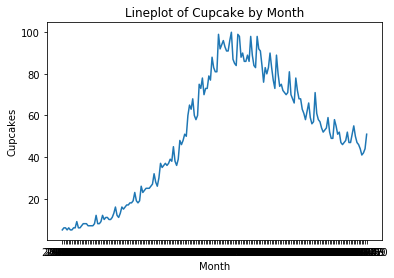

In [45]:
plt.plot(visualization['Month'],visualization['Cupcake: (Worldwide)'])
plt.title('Lineplot of Cupcake by Month')
plt.xlabel('Month')
plt.ylabel('Cupcakes')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

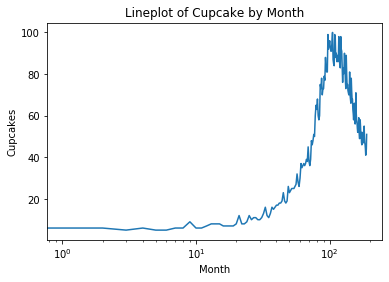

In [46]:
plt.plot(visualization['Month'],visualization['Cupcake: (Worldwide)'])
plt.xscale('log')
plt.title('Lineplot of Cupcake by Month')
plt.xlabel('Month')
plt.ylabel('Cupcakes')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

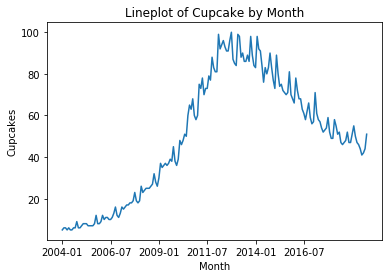

In [47]:
plt.plot(visualization['Month'],visualization['Cupcake: (Worldwide)'])
plt.title('Lineplot of Cupcake by Month')
plt.xlabel('Month')
plt.ylabel('Cupcakes')
plt.xticks([0,30,60,90,120,150])
plt.show

Scatter Plot

<function matplotlib.pyplot.show(*args, **kw)>

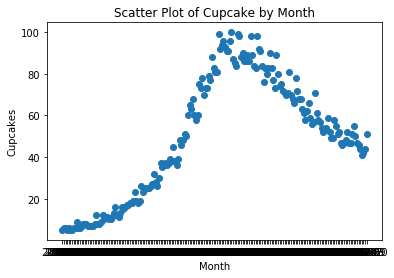

In [50]:
plt.scatter(visualization['Month'],visualization['Cupcake: (Worldwide)'])
plt.title('Scatter Plot of Cupcake by Month')
plt.xlabel('Month')
plt.ylabel('Cupcakes')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

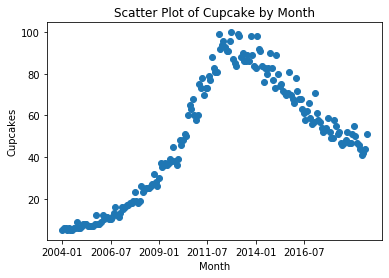

In [51]:
plt.scatter(visualization['Month'],visualization['Cupcake: (Worldwide)'])
plt.title('Scatter Plot of Cupcake by Month')
plt.xlabel('Month')
plt.ylabel('Cupcakes')
plt.xticks([0,30,60,90,120,150])
plt.show

Histogram

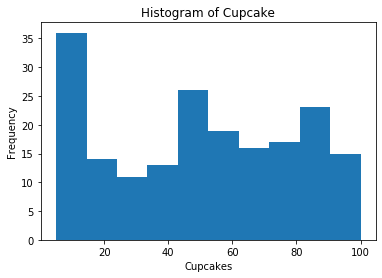

In [52]:
plt.hist(visualization['Cupcake: (Worldwide)'], bins=None)
plt.title('Histogram of Cupcake')
plt.xlabel('Cupcakes')
plt.ylabel('Frequency')
plt.show()

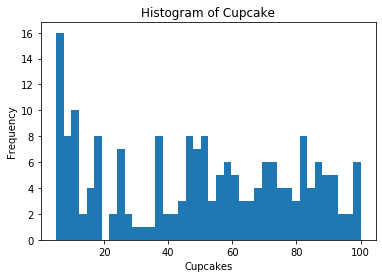

In [53]:
plt.hist(visualization['Cupcake: (Worldwide)'], bins=40)
plt.title('Histogram of Cupcake')
plt.xlabel('Cupcakes')
plt.ylabel('Frequency')
plt.show()

Bar Plot

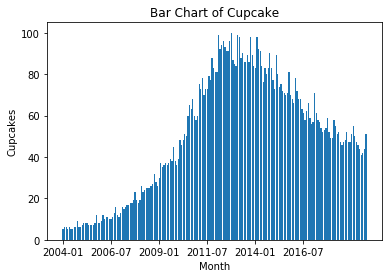

In [54]:
plt.bar(visualization['Month'],visualization['Cupcake: (Worldwide)'])
plt.title('Bar Chart of Cupcake')
plt.xlabel('Month')
plt.ylabel('Cupcakes')
plt.xticks([0,30,60,90,120,150])
plt.show()

Pie Chart

([<matplotlib.patches.Wedge at 0x248a460f148>,
 [Text(1.0999984794018136, 0.001829019873550418, '2004-01'),
  Text(1.0999844291075054, 0.00585283871602196, '2004-02'),
  Text(1.0999523143733017, 0.010242368125464116, '2004-03'),
  Text(1.0999074880797033, 0.01426596180415502, '2004-04'),
  Text(1.099847943646314, 0.018289364586409302, '2004-05'),
  Text(1.099773681869913, 0.022312522634058557, '2004-06'),
  Text(1.0996934007493078, 0.025969681330785283, '2004-07'),
  Text(1.0995910451524051, 0.0299922226692406, '2004-08'),
  Text(1.0994626034043957, 0.03437999004113702, '2004-09'),
  Text(1.099277429852065, 0.03986392125517418, '2004-10'),
  Text(1.0990649035601519, 0.045346860556317294, '2004-11'),
  Text(1.0988751920885518, 0.04973240605831062, '2004-12'),
  Text(1.0986499238855278, 0.054482517804559545, '2005-01'),
  Text(1.0983644846568483, 0.05996214509585452, '2005-02'),
  Text(1.0980298925724299, 0.06580543303845283, '2005-03'),
  Text(1.0976642144760325, 0.07164685798215326, '2

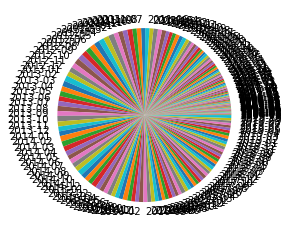

In [55]:
plt.pie(visualization['Cupcake: (Worldwide)'], labels =visualization['Month'] )